In [1]:
%load_ext autoreload
%autoreload 2
import os
from matplotlib import pyplot as plt
import numpy as np
import torch
import os
import pickle
import torchvision

C:\Users\shawn\anaconda3\envs\cs7643-final\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from datasets.dataset import RetinaSegmentationDataset
from model.unet import Unet

In [3]:
rootdir = "C:\\Users\\shawn\\Desktop\\Development\\CS7643\\data\\DATA_4D_Patches\\DATA_4D_Patches\\"

In [4]:
learning_rate = 0.0001
batch_size = 64
workers = 8

# Get the device
device = "cpu"
if torch.cuda.is_available():
    device = "cuda:0"

# Initialize the model on the GPU
model = Unet(hidden_channels=(64, 128, 256, 512, 1024)).to(device)
# TODO: Reload parameters
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.BCEWithLogitsLoss()

# Load the training datasets
training_path = os.path.join(rootdir, "Training")
training_file_basenames = os.listdir(os.path.join(training_path, "images"))
training_dataset = RetinaSegmentationDataset(training_path, training_file_basenames)
training_dataloader = torch.utils.data.DataLoader(
        training_dataset, batch_size=batch_size, num_workers=workers,
        pin_memory=True, shuffle=True)

# Load the validation datasets
validation_path = os.path.join(rootdir, "Validation")
validation_file_basenames = os.listdir(os.path.join(validation_path, "images"))
validation_dataset = RetinaSegmentationDataset(validation_path, validation_file_basenames)
validation_dataloader = torch.utils.data.DataLoader(
        validation_dataset, batch_size=batch_size, num_workers=workers,
        pin_memory=True, shuffle=False)

In [5]:
import torch.nn.functional as F

In [6]:
prev_weights = torch.load("..//checkpoint//image-segmentation-checkpoint.pth")
prev_weights

{'epoch': 1,
 'model': OrderedDict([('encoder.conv_blocks.0.conv_1.weight',
               tensor([[[[ 0.0702, -0.1144, -0.0651],
                         [-0.1380,  0.0900,  0.0093],
                         [-0.1211,  0.0455, -0.1485]],
               
                        [[-0.1442,  0.1219, -0.1582],
                         [ 0.0031,  0.0809, -0.0494],
                         [-0.0193, -0.0515,  0.0557]],
               
                        [[-0.0355, -0.1274, -0.0599],
                         [ 0.0433, -0.0113, -0.1196],
                         [-0.1583,  0.0325, -0.0613]],
               
                        [[-0.0172, -0.0582, -0.1186],
                         [ 0.0338,  0.1434, -0.1030],
                         [ 0.0574, -0.0792, -0.0559]]],
               
               
                       [[[ 0.0498, -0.0872,  0.0216],
                         [-0.0473, -0.0502,  0.1183],
                         [ 0.1328,  0.0065, -0.1656]],
               
            

In [7]:
model.load_state_dict(prev_weights["model"])

<All keys matched successfully>

C:\Users\shawn\anaconda3\envs\cs7643-final\lib\site-packages\torch\nn\functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


<IPython.core.display.Javascript object>


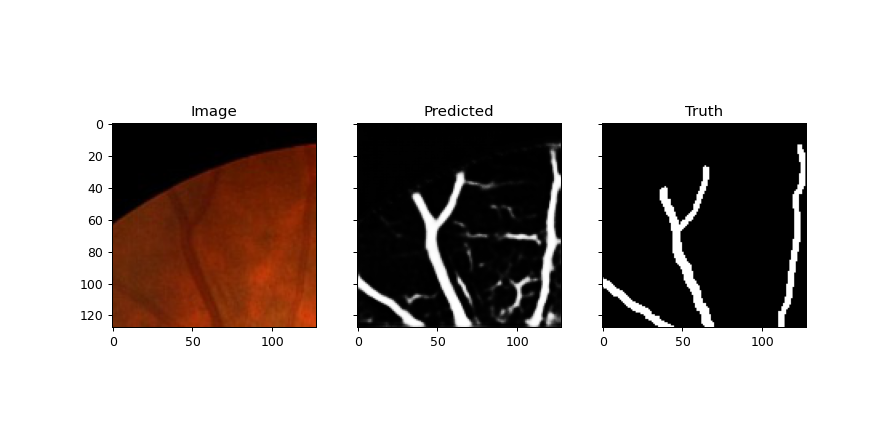

<IPython.core.display.Javascript object>


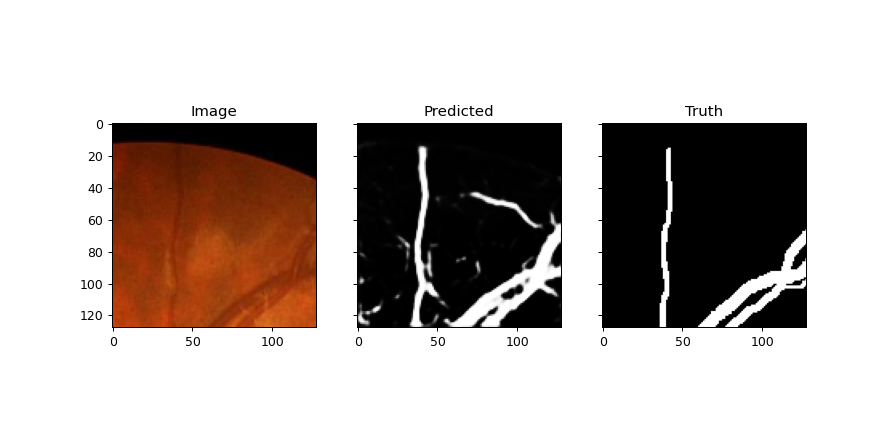

<IPython.core.display.Javascript object>


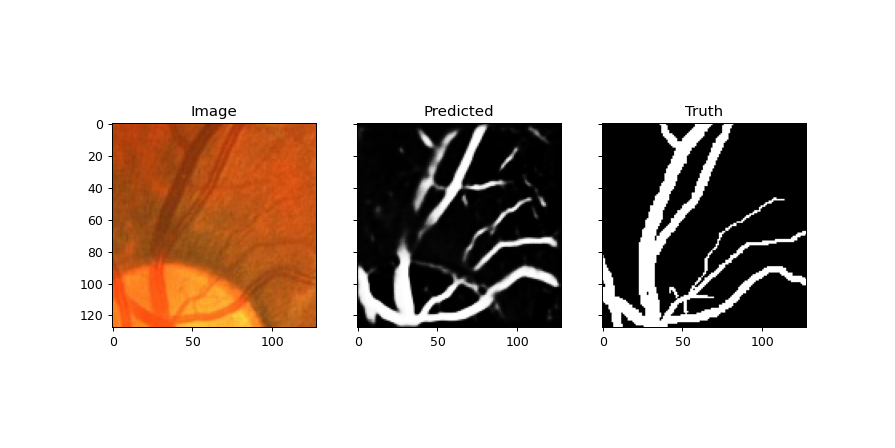

<IPython.core.display.Javascript object>


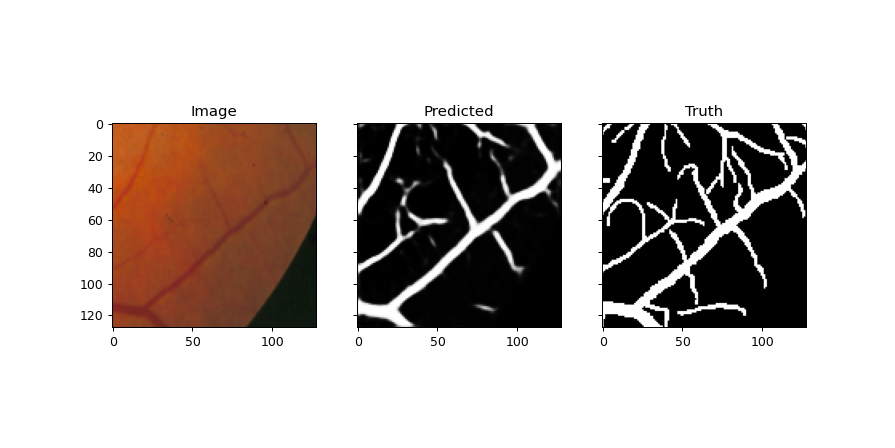

<IPython.core.display.Javascript object>


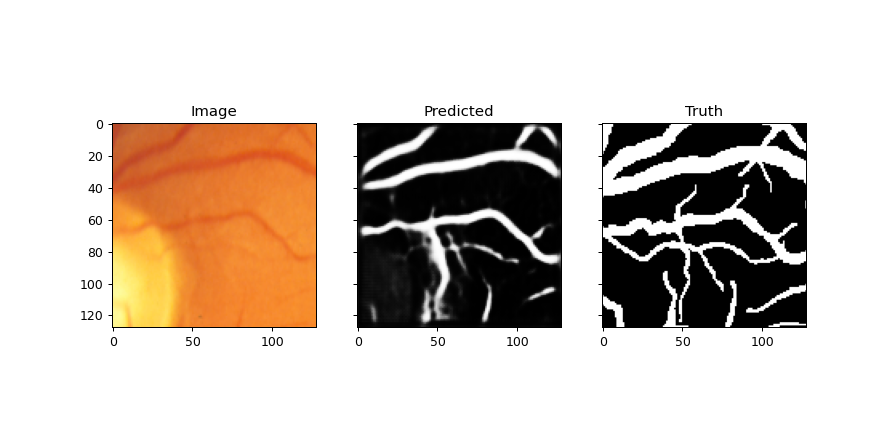

In [8]:
%matplotlib notebook
for ind in (1, 5, 20, 10000, -1):
    img, lbl = training_dataset[ind]
    img = img.to(device)
    new_output = F.sigmoid(model(img.unsqueeze(0))).cpu().detach().numpy()[0, 0, :, :]

    f, ax = plt.subplots(1, 3, sharey=True, sharex=True, figsize=[10, 5])
    ax[0].imshow(img.to("cpu").squeeze(0).permute([1, 2, 0]).numpy()[:,:,:-1])
    ax[0].set_title("Image")
    ax[1].imshow(new_output, cmap="gray")
    ax[1].set_title("Predicted")
    ax[2].imshow(lbl.squeeze(0).numpy(), cmap="gray")
    ax[2].set_title("Truth")
    plt.show()

<IPython.core.display.Javascript object>


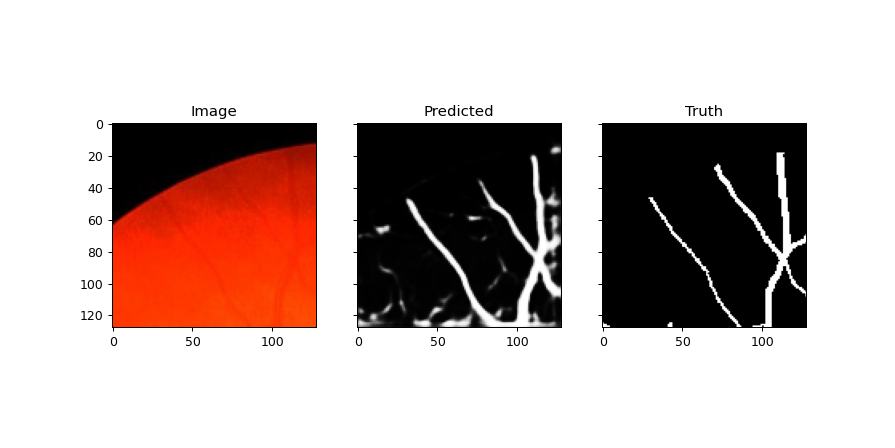

<IPython.core.display.Javascript object>


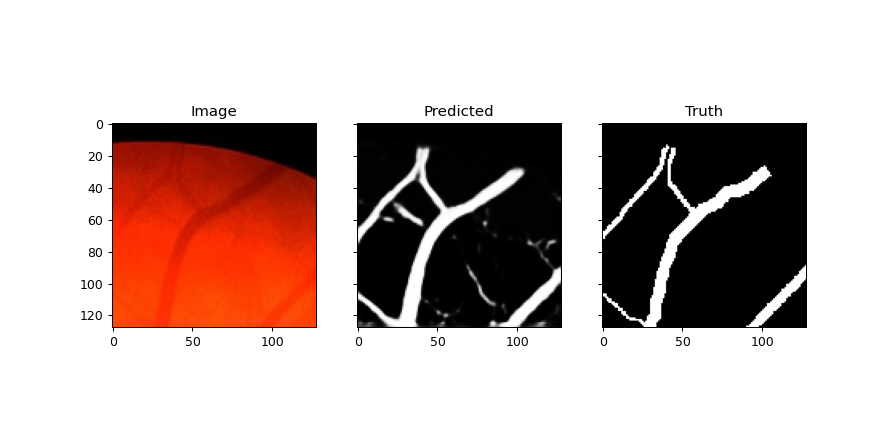

<IPython.core.display.Javascript object>


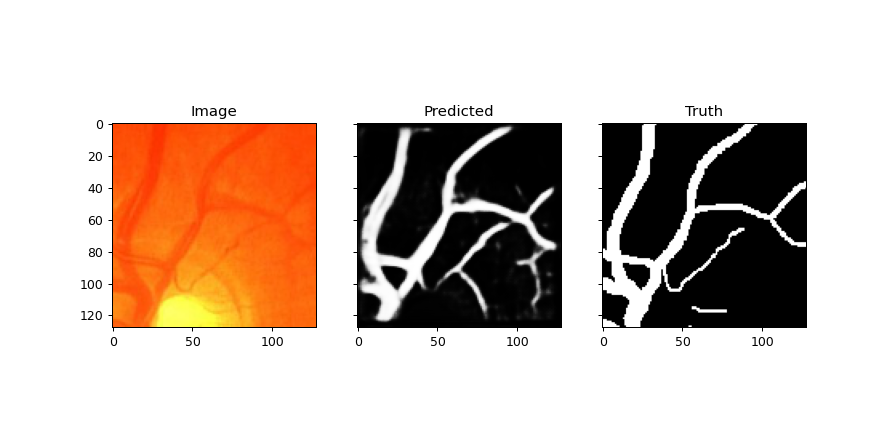

<IPython.core.display.Javascript object>


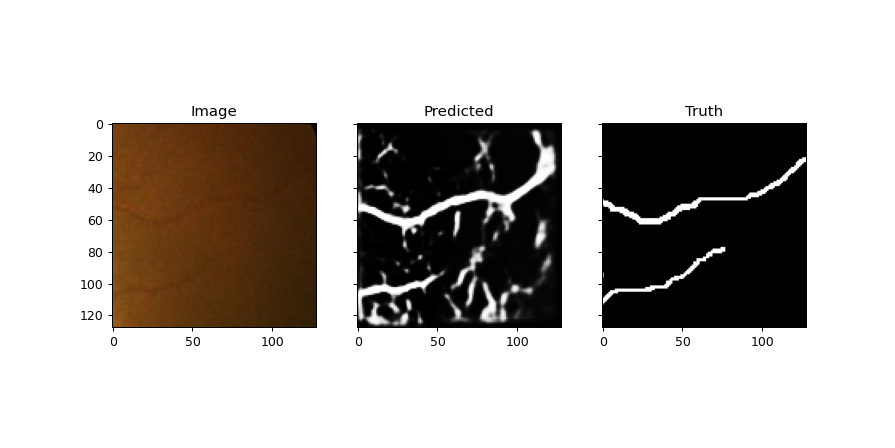

<IPython.core.display.Javascript object>


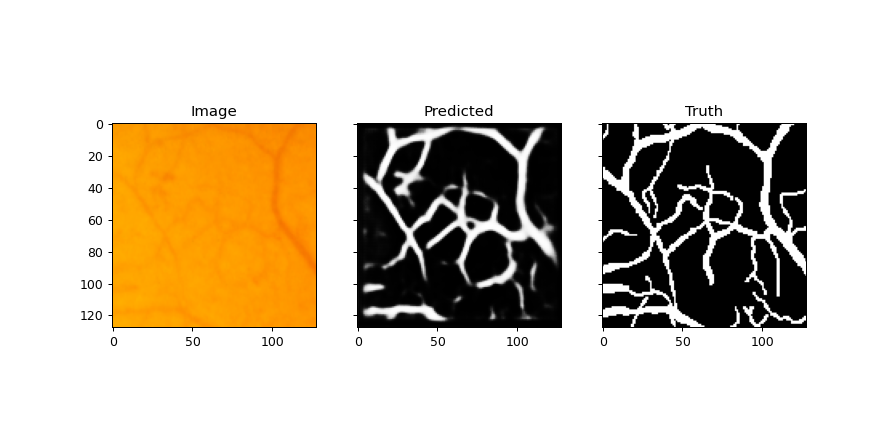

In [9]:
%matplotlib notebook
for ind in (1, 5, 20, 1000, -1):
    img, lbl = validation_dataset[ind]
    img = img.to(device)
    new_output = F.sigmoid(model(img.unsqueeze(0))).cpu().detach().numpy()[0, 0, :, :]

    f, ax = plt.subplots(1, 3, sharey=True, sharex=True, figsize=[10, 5])
    ax[0].imshow(img.to("cpu").squeeze(0).permute([1, 2, 0]).numpy()[:,:,:-1])
    ax[0].set_title("Image")
    ax[1].imshow(new_output, cmap="gray")
    ax[1].set_title("Predicted")
    ax[2].imshow(lbl.squeeze(0).numpy(), cmap="gray")
    ax[2].set_title("Truth")